In [202]:
import numpy as np
import matplotlib.pyplot as plt
import time    

In [203]:
T0 = 4         
f0 = 1/T0       
t_max = T0      
dt = 0.01 
N=20
T=np.arange(0,t_max,dt)

def u():
    return (np.cos(2*np.pi*f0*T) > 0)*1 


### 1) Tracage le signal U en fonction de T

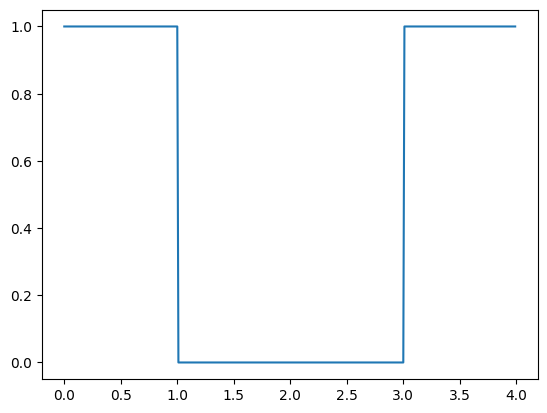

In [204]:

plt.plot(T,u(), label='Signal u(t)')

### 2) le calcul des coeficients de fourier

In [205]:
def Uappr(U, T , N):
    a= [sum(U)*dt/T0]      #a0
    b = [0]                           # b0
    c =[abs(a[0])] 

    for i in range(1,N):
        a.append((2/T0)*dt*sum(U*np.cos(2*np.pi*i*f0*T)))
        b.append((2/T0)*dt*sum(U*np.sin(2*np.pi*i*f0*T)))
        c.append(np.sqrt(a[-1]**2+b[-1]**2))

    Uapp=[a[0]]*len(T)

    for k in range(1,N):
        Uapp+=a[k]*np.cos(2*np.pi*f0*k*T)
        Uapp+=b[k]*np.sin(2*np.pi*f0*k*T)

    return Uapp, c , a, b 



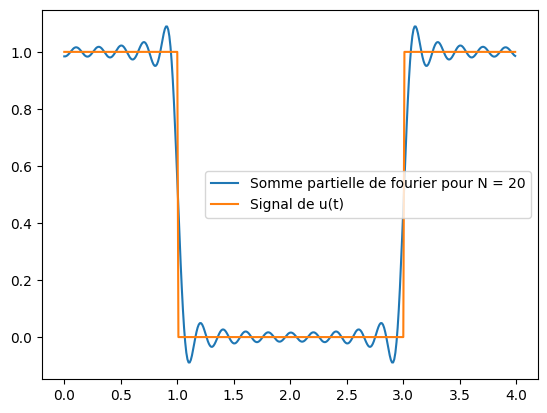

In [206]:
plt.plot(T, Uappr(u(), T, N)[0], label=f'Somme partielle de fourier pour N = {N}')
plt.plot(T,u(), label="Signal de u(t)")
plt.legend()

### 3) Affichage la solution approché par fourier sur plusieurs période

In [207]:
muT=2
Uapp=list(Uappr(u(), T, N)[0])
U =list(u())
for i in range(1,muT):
    Uapp +=Uapp
    U +=U
    Tmul=np.arange(0,muT*t_max,dt)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


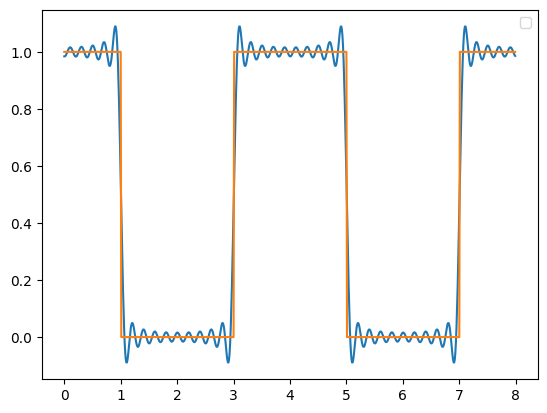

In [208]:
plt.plot(Tmul,Uapp)
plt.plot(Tmul,U)
plt.legend()

### 4) Spectre

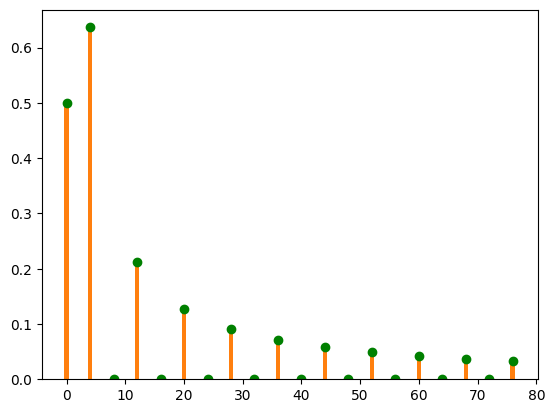

In [210]:
T_Z = np.asarray(list(range(N)))*T0 
plt.bar(T_Z, Uappr(u(), T, N)[1])

T_Z = np.asarray(list(range(N)))*T0 
plt.bar(T_Z, Uappr(u(), T, N)[1])
plt.scatter(T_Z, Uappr(u(), T, N)[1], color="g")